In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/dataset_no_blind.csv')
blind_test = pd.read_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/blind_data.csv')

In [3]:
scaler = StandardScaler()
scaler.fit(dataset[['GR','ILD_log10','NPHI']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
cv1 = KFold(n_splits=4, shuffle=True, random_state=42)

In [5]:
rForest = RandomForestRegressor(n_jobs=2, min_samples_leaf=27, max_depth=8, max_leaf_nodes=22)
params={'n_estimators':np.arange(1,101)}
rForestReg = GridSearchCV(rForest,params,scoring='neg_mean_squared_error', cv=cv1, return_train_score=True)
rForestReg.fit(scaler.transform(dataset[['GR','ILD_log10','NPHI']]),dataset.RHOB)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=8, max_features='auto',
                                             max_leaf_nodes=22,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=27,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_j...
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  5

In [6]:
print(rForestReg.best_estimator_)
print(rForestReg.best_params_)
print(rForestReg.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=22,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=27, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=49, n_jobs=2,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
{'n_estimators': 49}
-0.01669076334135427


In [7]:
df = pd.DataFrame(rForestReg.cv_results_)
df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
48,0.624003,0.067434,0.132812,0.025105,49,{'n_estimators': 49},-0.016414,-0.018372,-0.016305,-0.015673,-0.016691,0.001011,1,-0.015626,-0.015134,-0.015980,-0.015801,-0.015635,0.000316
63,2.921793,3.191167,0.116371,0.012700,64,{'n_estimators': 64},-0.016350,-0.018346,-0.016403,-0.015665,-0.016691,0.000999,2,-0.015674,-0.015145,-0.015992,-0.015756,-0.015642,0.000310
68,0.876000,0.122733,0.107295,0.004712,69,{'n_estimators': 69},-0.016425,-0.018330,-0.016359,-0.015672,-0.016697,0.000988,3,-0.015674,-0.015121,-0.015977,-0.015813,-0.015646,0.000322
90,1.070637,0.096857,0.118879,0.024331,91,{'n_estimators': 91},-0.016334,-0.018355,-0.016380,-0.015729,-0.016699,0.000990,4,-0.015619,-0.015111,-0.015963,-0.015817,-0.015627,0.000322
60,0.631424,0.030954,0.110283,0.009145,61,{'n_estimators': 61},-0.016399,-0.018315,-0.016399,-0.015705,-0.016704,0.000972,5,-0.015666,-0.015126,-0.016018,-0.015846,-0.015664,0.000335
78,0.837247,0.023275,0.116225,0.008366,79,{'n_estimators': 79},-0.016440,-0.018345,-0.016303,-0.015746,-0.016708,0.000980,6,-0.015731,-0.015135,-0.015992,-0.015799,-0.015664,0.000320
64,0.857365,0.076547,0.140734,0.044824,65,{'n_estimators': 65},-0.016352,-0.018450,-0.016391,-0.015644,-0.016709,0.001048,7,-0.015682,-0.015143,-0.015966,-0.015779,-0.015642,0.000306
67,0.735239,0.023500,0.103744,0.000469,68,{'n_estimators': 68},-0.016399,-0.018297,-0.016429,-0.015714,-0.016710,0.000960,8,-0.015716,-0.015120,-0.016035,-0.015776,-0.015662,0.000335
69,0.731045,0.040159,0.104260,0.000432,70,{'n_estimators': 70},-0.016441,-0.018255,-0.016438,-0.015708,-0.016710,0.000940,9,-0.015708,-0.015109,-0.016044,-0.015808,-0.015667,0.000344
82,0.792273,0.017536,0.105017,0.002553,83,{'n_estimators': 83},-0.016459,-0.018385,-0.016384,-0.015626,-0.016713,0.001019,10,-0.015709,-0.015077,-0.016032,-0.015790,-0.015652,0.000353


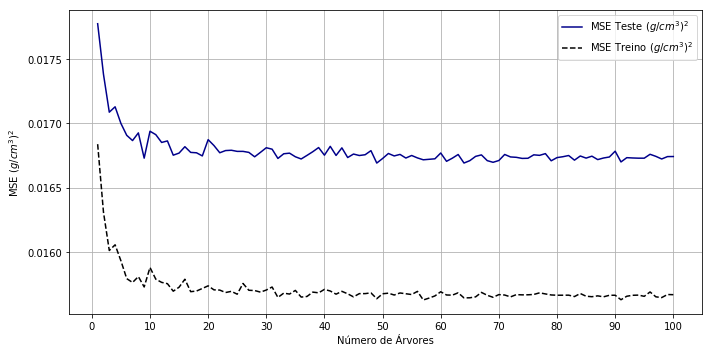

In [8]:
plt.figure(figsize = ((10,5)))
plt.plot(df.sort_values(by='param_n_estimators').param_n_estimators,
         -df.sort_values(by='param_n_estimators').mean_test_score,
        c='darkblue', label='MSE Teste $(g/cm^3)^2$')
plt.plot(df.sort_values(by='param_n_estimators').param_n_estimators,
            -df.sort_values(by='param_n_estimators').mean_train_score,
        c='black', ls='--', label = 'MSE Treino $(g/cm^3)^2$')

plt.legend()
plt.grid()
plt.xticks(np.arange(0,100+1,10))
plt.xlabel('Número de Árvores')
plt.ylabel('MSE $(g/cm^3)^2$')

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

plt.tight_layout()

Aqui acontece a construção da árvore e o seu treinamento

In [9]:
x_blindscale = scaler.transform(blind_test[['GR','ILD_log10','NPHI']])

In [10]:
blind_test['RHOB_r_forest'] = rForestReg.predict(x_blindscale)

Cálculo do MSE para os dados de treinamento e teste

Predição dos dados do teste cego, atribuindo seus valores à coluna RHOB_r_forest no dataset

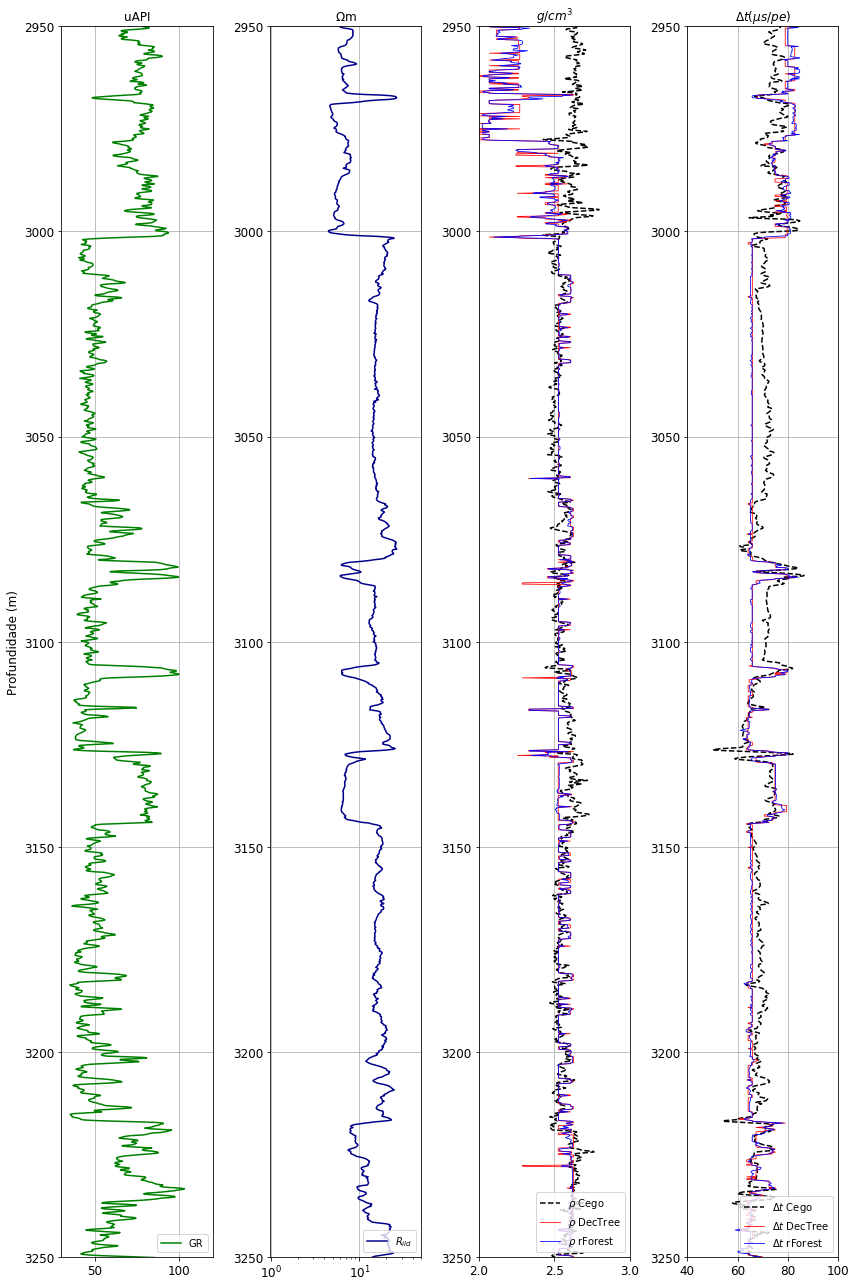

In [11]:
fig, axes = plt.subplots(ncols=4, figsize=(12,18))
#axes2 = axes[2].twiny()

axes[0].plot(blind_test.GR, blind_test.DEPT, c='green', label='GR')
axes[0].set_xlim(30,120)

axes[1].semilogx(blind_test.ILD,blind_test.DEPT, c = 'darkblue', label='$R_{ild}$')
axes[1].set_xlim(0,50)

axes[2].plot(blind_test.RHOB, blind_test.DEPT, c = 'black', label='$\\rho$ Cego', ls='--')
axes[2].plot(blind_test.RHOB_dec_tree,blind_test.DEPT, c='red', label='$\\rho$ DecTree', lw=0.8)
axes[2].plot(blind_test.RHOB_r_forest, blind_test.DEPT, c='blue', label='$\\rho$ rForest', lw=0.8)
axes[2].set_xlim(2,3)

# axes2.plot(blind_test.NPHI, blind_test.DEPT, c = 'blue', label = 'NPHI', lw = 0.8, ls='--')
# axes2.set_xlim(0,45)
# axes2.legend(loc='upper right')
# axes2.invert_yaxis()

axes[3].plot(blind_test.DT.loc[(blind_test.DT > 0)].values, 
           blind_test.DEPT.loc[(blind_test.DT > 0)].values, c='black', label='$\Delta t$ Cego', ls='--')
axes[3].plot(blind_test.DT_dec_tree.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
             c='red', label='$\Delta t$ DecTree', lw=0.8)
axes[3].plot(blind_test.DT_r_forest.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
             c='blue', label='$\Delta t$ rForest', lw=0.8)
axes[3].set_xlim(40,100)

axes[0].set_title('uAPI')
axes[1].set_title('$\Omega$m')
#axes2.set_xlabel('$\phi_n$(%)')
axes[2].set_title('$g/cm^3$')
axes[3].set_title('$\Delta t  (\mu s/pe )$')
axes[0].set_ylabel('Profundidade (m)')


for ax in axes:
    ax.set_ylim(2950,3250)
    ax.invert_yaxis()
    ax.grid()
    ax.legend(loc=4)
    
axes[2].legend(loc='lower right')
axes[3].legend(loc='lower right')

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

fig.tight_layout()

In [12]:
blind_test.to_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/blind_data.csv')

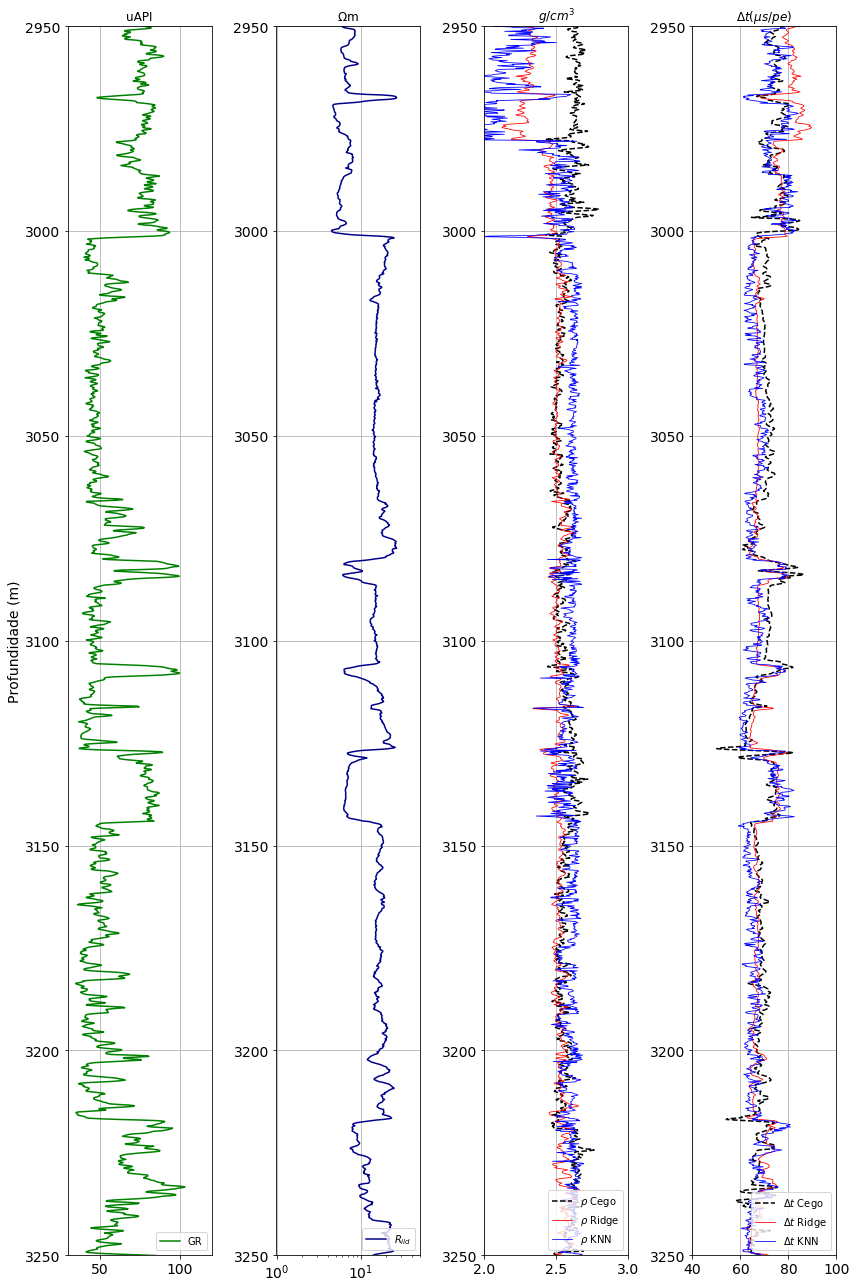

In [13]:
fig, axes = plt.subplots(ncols=4, figsize=(12,18))
#axes2 = axes[2].twiny()

axes[0].plot(blind_test.GR, blind_test.DEPT, c='green', label='GR')
axes[0].set_xlim(30,120)

axes[1].semilogx(blind_test.ILD,blind_test.DEPT, c = 'darkblue', label='$R_{ild}$')
axes[1].set_xlim(0,50)

axes[2].plot(blind_test.RHOB, blind_test.DEPT, c = 'black', label='$\\rho$ Cego', ls='--')
axes[2].plot(blind_test.RHOB_Ridge,blind_test.DEPT, c='red', label='$\\rho$ Ridge', lw=0.8)
axes[2].plot(blind_test.RHOB_KNN, blind_test.DEPT, c='blue', label='$\\rho$ KNN', lw=0.8)
axes[2].set_xlim(2,3)

# axes2.plot(blind_test.NPHI, blind_test.DEPT, c = 'blue', label = 'NPHI', lw = 0.8, ls='--')
# axes2.set_xlim(0,45)
# axes2.legend(loc='upper right')
# axes2.invert_yaxis()

axes[3].plot(blind_test.DT.loc[(blind_test.DT > 0)].values, 
           blind_test.DEPT.loc[(blind_test.DT > 0)].values, c='black', label='$\Delta t$ Cego', ls='--')
axes[3].plot(blind_test.DT_Ridge.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
             c='red', label='$\Delta t$ Ridge', lw=0.8)
axes[3].plot(blind_test.DT_KNN.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
             c='blue', label='$\Delta t$ KNN', lw=0.8)
axes[3].set_xlim(40,100)

axes[0].set_title('uAPI')
axes[1].set_title('$\Omega$m')
#axes2.set_xlabel('$\phi_n$(%)')
axes[2].set_title('$g/cm^3$')
axes[3].set_title('$\Delta t  (\mu s/pe )$')
axes[0].set_ylabel('Profundidade (m)')


for ax in axes:
    ax.set_ylim(2950,3250)
    ax.invert_yaxis()
    ax.grid()
    ax.legend(loc=4)
    
axes[2].legend(loc='lower right')
axes[3].legend(loc='lower right')

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

fig.tight_layout()